In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

2024-04-15 21:40:07.784847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 21:40:07.994644: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-15 21:40:07.994670: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-15 21:40:08.020332: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 21:40:09.328635: W tensorflow/stream_executor/platform/de

In [ ]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("dataset.csv")

# Data 1 Cleaning

In [ ]:
data1.shape

(50005, 18)

In [ ]:
data1.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [ ]:
#all the rows that are null
data1[data1['instance_id'].isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#because all the column values are none values, drop those rows
before_drop_na = len(data1)
data1 = data1.dropna()
after_drop_na = len(data1)
print("number of data dropped:", before_drop_na-after_drop_na)

number of data dropped: 5


In [ ]:
data1.shape

(50000, 18)

# What to do with Tempo column in Data 1

In [ ]:
#the tempo column in data 1 are strings with "?", therefore need to convert to integer
print(len(data1[data1["tempo"] == "?"]))
print(len(data1))

4980
50000


# Label encoding variables in data 1

In [ ]:
#make key, mode into One Hot encoding
#music_genre into label encoding
onehot = OneHotEncoder(sparse=False)
onehot.fit(data1[['key', 'mode']])
onehotencoded = onehot.transform(data1[['key', 'mode']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data1[['key', 'mode']].columns) for cat in onehot.categories_[i]]
onehotdf = pd.DataFrame(onehotencoded, columns=categorical_columns)
data1 = pd.concat([data1.reset_index(), onehotdf.reset_index()], axis=1)

labelencoder = LabelEncoder()
data1['key_num'] = labelencoder.fit_transform(data1['key'])
data1['mode_num'] = labelencoder.fit_transform(data1['mode'])
data1['music_genre_num'] = labelencoder.fit_transform(data1['music_genre'])
data1

,index,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key_num,mode_num,music_genre_num
0,0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,5
1,1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,5
2,2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11,0,5
3,3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,5
4,4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,6
49996,50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,6
49997,50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,0,6
49998,50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,1,6


In [ ]:
data1_edit = data1.drop(columns = ["index", "instance_id", "artist_name", "track_name", "music_genre", "key", "mode", "tempo", "obtained_date", "key_num", "mode_num", "music_genre_num"])
features = data1_edit.columns

In [ ]:
features

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major',
       'mode_Minor'],
      dtype='object')

In [ ]:
data1_edit

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,0.759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,0.531,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,0.333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,0.270,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,0.323,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,0.330,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,0.113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,0.395,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0441,0.354,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# CNN Baseline (Data 1)

In [ ]:
# Separate features and target variable
X = data1_edit  
y = data1['music_genre_num']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data1["music_genre"], test_size=0.2, random_state=1)

y_train_encoded = labelencoder.fit_transform(y_train)
y_test_encoded = labelencoder.transform(y_test)

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_acc)

2024-04-15 21:40:14.397950: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-15 21:40:14.398003: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-15 21:40:14.398031: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-3da032f1-e5ab-4726-ac09-eb3d9c053730): /proc/driver/nvidia/version does not exist
2024-04-15 21:40:14.398314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Epoch 1/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.4312 

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (40000, 24, 1)
X_test shape: (10000, 24, 1)


## Attempt 1

In [ ]:
# Define the CNN model with additional layers and regularization
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.2),  
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.2),  
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.2),  
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the enhanced architecture and regularization
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_acc)


Epoch 1/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.7616 - accuracy: 0.3401 - val_loss: 1.4168 - val_accuracy: 0.4700
Epoch 2/5
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4777 - accuracy: 0.4411 - val_loss: 1.3552 - val_accuracy: 0.4880
Epoch 3/5
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4134 - accuracy: 0.4666 - val_loss: 1.2933 - val_accuracy: 0.5118
Epoch 4/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.3760 - accuracy: 0.4789 - val_loss: 1.2575 - val_accuracy: 0.5221
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.2385 - accuracy: 0.5266
Test Accuracy: 0.5266000032424927


In [ ]:
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_acc)
y_pred = np.argmax(model.predict(X_test), axis=-1)

Epoch 1/5
1250/1250 [==============================] - 12s 9ms/step - loss: 1.3335 - accuracy: 0.4884 - val_loss: 1.2175 - val_accuracy: 0.5324
Epoch 2/5
1250/1250 [==============================] - 12s 10ms/step - loss: 1.3121 - accuracy: 0.5002 - val_loss: 1.2200 - val_accuracy: 0.5284
Epoch 3/5
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3046 - accuracy: 0.5021 - val_loss: 1.1871 - val_accuracy: 0.5403
Epoch 4/5
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2939 - accuracy: 0.5082 - val_loss: 1.1916 - val_accuracy: 0.5463
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.1864 - accuracy: 0.5426
Test Accuracy: 0.5425999760627747
313/313 [==============================] - 1s 3ms/step


<Figure size 10000x8000 with 0 Axes>

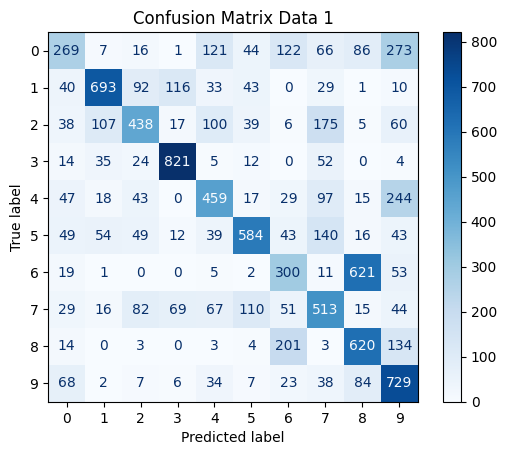

In [ ]:
cm1 = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(100, 80))
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=np.unique(y_test_encoded)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 1')
plt.show()
#print("Confusion Matrix:")
#print(conf_matrix)

In [ ]:
unique_labels = np.unique(y_test)
class_names = [str(label) for label in unique_labels]



In [ ]:
print("Classification Report for Data 1:")
print(classification_report(y_test_encoded, y_pred, target_names = class_names))

Classification Report for Data 1:
              precision    recall  f1-score   support

 Alternative       0.46      0.27      0.34      1005
       Anime       0.74      0.66      0.70      1057
       Blues       0.58      0.44      0.50       985
   Classical       0.79      0.85      0.82       967
     Country       0.53      0.47      0.50       969
  Electronic       0.68      0.57      0.62      1029
     Hip-Hop       0.39      0.30      0.34      1012
        Jazz       0.46      0.52      0.48       996
         Rap       0.42      0.63      0.51       982
        Rock       0.46      0.73      0.56       998

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.54     10000
weighted avg       0.55      0.54      0.54     10000



## Data 2 Cleaning

In [ ]:
data2.shape

(114000, 21)

In [ ]:
data2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#drop all the rows that are null
data2 = data2.dropna()

In [ ]:
len(data2)

113999

In [ ]:
#make track_genre into label encoding
labelencoder = LabelEncoder()
data2['track_genre_num'] = labelencoder.fit_transform(data2['track_genre'])
data2

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_num
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,113
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,113
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,113
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,113


In [ ]:
features2 = ["popularity", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
len(features2)

14

## CNN Baseline (Data 2)

In [ ]:
# Separate features and target variable for data 2
X2 = data2[features2]  # Features for data 2
y2 = data2['track_genre_num']  # Target variable for data 2

# Split the dataset into training and testing sets for data 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

y_train_encoded2 = labelencoder.fit_transform(y_train2)
y_test_encoded2 = labelencoder.transform(y_test2)

# Standardize the features for data 2 
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Reshape the data for CNN input for data 2
X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)

# Define the CNN model for data 2
model2 = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train2.shape[1], 1)),
    Conv1D(64, 3, activation='relu'),
    Conv1D(128, 3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y2)), activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for data 2
model2.fit(X_train2, y_train_encoded2, epochs=5, batch_size=32, validation_data=(X_test2, y_test_encoded2))

# Evaluate the model on the test set for data 2
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test_encoded2)
print("Test Accuracy for Data 2:", test_acc2)


Epoch 1/5
2850/2850 [==============================] - 35s 12ms/step - loss: 3.3422 - accuracy: 0.1872 - val_loss: 2.9731 - val_accuracy: 0.2380
Epoch 2/5
2850/2850 [==============================] - 35s 12ms/step - loss: 2.8621 - accuracy: 0.2645 - val_loss: 2.7864 - val_accuracy: 0.2735
Epoch 3/5
2850/2850 [==============================] - 35s 12ms/step - loss: 2.7053 - accuracy: 0.2916 - val_loss: 2.6947 - val_accuracy: 0.2954
Epoch 4/5
2850/2850 [==============================] - 34s 12ms/step - loss: 2.6146 - accuracy: 0.3075 - val_loss: 2.6364 - val_accuracy: 0.3024
Epoch 5/5
713/713 [==============================] - 3s 5ms/step - loss: 2.6120 - accuracy: 0.3101
Test Accuracy for Data 2: 0.31013157963752747


In [ ]:
print("Shape of X_train2 before reshaping:", X_train2.shape)
print("Shape of X_test2 before reshaping:", X_test2.shape)

# Reshape the data for CNN input for data 2
X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)

print("Shape of X_train2 after reshaping:", X_train2.shape)
print("Shape of X_test2 after reshaping:", X_test2.shape)


Shape of X_train2 before reshaping: (91199, 14, 1)
Shape of X_test2 before reshaping: (22800, 14, 1)
Shape of X_train2 after reshaping: (91199, 14, 1)
Shape of X_test2 after reshaping: (22800, 14, 1)


## Attempt 1

In [ ]:
model2 = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train2.shape[1], X_train2.shape[2]), padding='same'),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu', padding='same'),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y2)), activation='softmax')
])

# Compile the model with a lower learning rate
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the enhanced architecture and regularization for data 2
history2 = model2.fit(X_train2, y_train_encoded2, epochs=5, batch_size=32, validation_data=(X_test2, y_test_encoded2), callbacks=[early_stopping])

# Evaluate the model for data 2
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test_encoded2)
print("Test Accuracy for Data 2:", test_acc2)

Epoch 1/5
2850/2850 [==============================] - 29s 10ms/step - loss: 3.3392 - accuracy: 0.1885 - val_loss: 2.9589 - val_accuracy: 0.2408
Epoch 2/5
2850/2850 [==============================] - 27s 9ms/step - loss: 2.8581 - accuracy: 0.2623 - val_loss: 2.7808 - val_accuracy: 0.2734
Epoch 3/5
2850/2850 [==============================] - 27s 10ms/step - loss: 2.7238 - accuracy: 0.2863 - val_loss: 2.7157 - val_accuracy: 0.2881
Epoch 4/5
2850/2850 [==============================] - 27s 9ms/step - loss: 2.6399 - accuracy: 0.2980 - val_loss: 2.6752 - val_accuracy: 0.2901
Epoch 5/5
713/713 [==============================] - 3s 4ms/step - loss: 2.6448 - accuracy: 0.3000
Test Accuracy for Data 2: 0.29995614290237427


In [ ]:
print("Shape of X_train2 before reshaping:", X_train2.shape)
print("Shape of X_test2 before reshaping:", X_test2.shape)


Shape of X_train2 before reshaping: (91199, 14, 1)
Shape of X_test2 before reshaping: (22800, 14, 1)


In [ ]:
history2 = model2.fit(X_train2, y_train_encoded2, epochs=5, batch_size=32, validation_data=(X_test2, y_test_encoded2), callbacks=[early_stopping])
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test_encoded2)
print("Test Accuracy for Data 2:", test_acc2)
y_pred2 = np.argmax(model2.predict(X_test2), axis=-1)

Epoch 1/5
2850/2850 [==============================] - 30s 10ms/step - loss: 2.5229 - accuracy: 0.3196 - val_loss: 2.6267 - val_accuracy: 0.3054
Epoch 2/5
2850/2850 [==============================] - 27s 10ms/step - loss: 2.4789 - accuracy: 0.3264 - val_loss: 2.6057 - val_accuracy: 0.3061
Epoch 3/5
2850/2850 [==============================] - 27s 9ms/step - loss: 2.4388 - accuracy: 0.3347 - val_loss: 2.6010 - val_accuracy: 0.3086
Epoch 4/5
2850/2850 [==============================] - 27s 9ms/step - loss: 2.4028 - accuracy: 0.3410 - val_loss: 2.5866 - val_accuracy: 0.3098
Epoch 5/5
713/713 [==============================] - 3s 4ms/step - loss: 2.5911 - accuracy: 0.3104
Test Accuracy for Data 2: 0.3103947341442108
713/713 [==============================] - 3s 3ms/step


<Figure size 10000x8000 with 0 Axes>

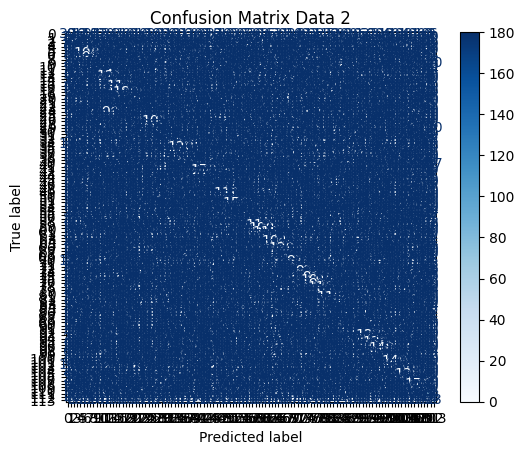

In [ ]:
cm2 = confusion_matrix(y_test_encoded2, y_pred2)
plt.figure(figsize=(100, 80))
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=np.unique(y_test_encoded2)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 2')
plt.show()
#print("Confusion Matrix:")
#print(conf_matrix)

In [ ]:
unique_labels2 = np.unique(y_test_encoded2)
class_names2 = [str(label) for label in unique_labels]

In [ ]:
print("Classification Report for Data 2:")
print(classification_report(y_test_encoded2, y_pred2))

Classification Report for Data 2:
              precision    recall  f1-score   support

           0       0.21      0.14      0.17       214
           1       0.36      0.14      0.20       202
           2       0.15      0.10      0.12       206
           3       0.12      0.08      0.09       201
           4       0.32      0.40      0.35       192
           5       0.21      0.24      0.23       199
           6       0.50      0.55      0.52       195
           7       0.35      0.56      0.43       178
           8       0.16      0.07      0.09       229
           9       0.18      0.24      0.21       206
          10       0.55      0.42      0.48       200
          11       0.10      0.03      0.04       187
          12       0.31      0.22      0.26       222
          13       0.40      0.60      0.48       203
          14       0.38      0.40      0.39       201
          15       0.27      0.27      0.27       208
          16       0.58      0.56      0.57    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>